In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Interpolation

## Polynomial interpolation

Interpolation Theorem: Through $n+1$ distinkt points $(x_i,y_i)$, $0\le i \le n$, there is a unique polynomial $p$ of degree $n$ satisfying $p(x_i)=y_i$. 

Interpolation polynomial:

$$p(x)=a_n x^n+a_{n_1}x^{n-1}+ \dots + a_1 x + a_0$$

we get a system of linear equations in the coefficients $a_k$. The system in matrix-vector form reads the following multiplication:

$$\begin{bmatrix}
x_0^n & x_0^{n-1} & \dots & x_0 & 1\\
x_1^n & x_1^{n-1} & \dots & x_1 & 1\\
\vdots & \vdots & & \vdots & \vdots\\
x_n^n & x_n^{n-1} & \dots & x_n & 1
\end{bmatrix}
\begin{bmatrix}
a_n\\
a_{n-1}\\
\vdots\\
a_0
\end{bmatrix}=
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}$$

We have to solve this system for $a_k$ to construct the interpolant p(x). The matrix on the left is commonly referred to as a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

We pick $n=5$ random points:

In [19]:
n=5;
x=np.arange(n+1);
y=10*np.random.rand(n+1);
A = np.linalg.solve(np.vander(x), y)
print(A) 
np.allclose(np.dot(np.vander(x), A), y)

[  0.36992523  -4.04340368  14.60090649 -19.43567623   6.27124052
   9.22337089]


True

A much more elegant way of doing polynomial fit is [Lagrange polynomials](https://en.wikipedia.org/wiki/Lagrange_polynomial), which is also used in `numpy.polyfit()` function.

`polyfit` returns the coefficients of the interpolating polynomial, polyval evaluates the polynomial on a given vector:

In [20]:
p = np.polyfit(x, y, n)  #polynomial of degree n
p

array([  0.36992523,  -4.04340368,  14.60090649, -19.43567623,
         6.27124052,   9.22337089])

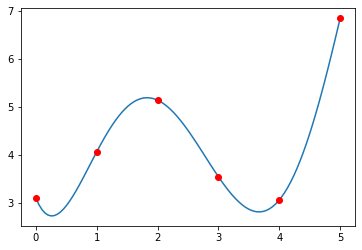

In [4]:
x1 = np.linspace(0, n, 100);
y1 = np.polyval(p, x1);
plt.plot(x1, y1);
plt.plot(x,y,'ro')


Exercise: Determine and plot the interpolation polynomial through $n$ equidistant points in the interval $[-5,5]$ for Runge's function

$$f(x)=\frac{1}{1+x^2}$$

In [5]:
f = lambda x : 1./(1 + x**2)
x1 = np.linspace(-5, 5, 100)
y1 = f(x1)

In [6]:
n = 13
x = np.linspace(-5, 5, n)
y = f(x)
p = np.polyfit(x, y, n-1)
y2 = np.polyval(p, x1)

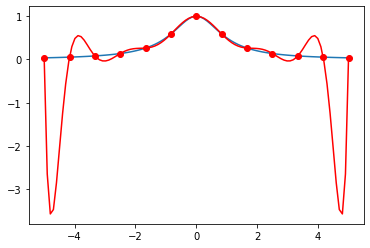

In [7]:
plt.plot(x1, y1)
plt.plot(x, y, 'ro')
plt.plot(x1, y2, 'r');

We see that the approximation is very bad near the endpoints of the interval. This can be seen from the formula for the interpolation error:

$$f(x) - p(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x-x_i)$$

where the product is largest near the endpoints ([Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)). Hence polynomial interpolation usually is not a good idea.

A better approach is piecewise linear interpolation

## linear interpolation

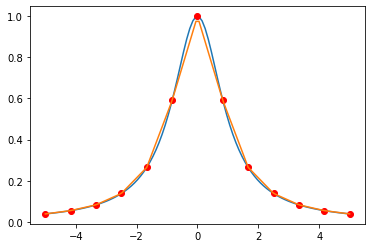

In [8]:
y3 = np.interp(x1,x, y)
plt.plot(x1, y1, x, y, 'ro', x1, y3)

## spline interpolation
or even better, cubic spline interpolation: here one determines piecewise cubic polynomials such that the resulting piecewise function and its first and second derivatives are continuous. There is a unique solution if in addition one specifies the second derivatives at the endpoints, e.g. setting them to zero (natural boundary conditions).

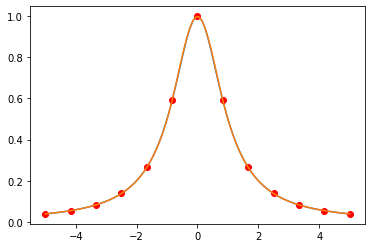

In [9]:
from scipy import interpolate
tck = interpolate.splrep(x, y)
y3 = interpolate.splev(x1, tck)
plt.plot(x1, y1, x, y, 'ro', x1, y3)

`scipy` separates the steps involved in spline interpolation into two operations, most likely for computational efficiency.

1. The coefficients describing the spline curve are computed, using `splrep()`. `splrep` returns an array of tuples containing the coefficients.
2. These coefficients are passed into `splev()` to actually evaluate the spline at the desired point $x$. $x$ can also be an array.

# Regression

Often one does not want to interpolate exactly, but is interested in a polynomial  of a given (low) order that fits the data best in the sense of least squares:

$$\text{rmse} := \sqrt{\frac{\sum_{i=0}^n (p(x_i) - y_i)^2}{n+1}} \rightarrow \text{min}$$

As an example, we generate data by adding random noise to a straight line and try to fit a linear polynomial (i.e. degree 1):

[2.16437068 0.0307877 ]


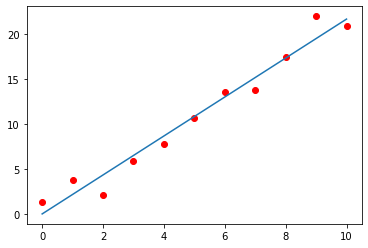

In [10]:
n=10
x = np.arange(n+1)
y = 1 + 2*x + np.random.randn(n+1)
p = np.polyfit(x, y, 1)
print(p)
x1 = np.linspace(0, 10, 100)
y1 = np.polyval(p, x1)
plt.plot(x, y, 'ro')
plt.plot(x1, y1)

### residual plot

A residual plot is a type of plot that displays the fitted values against the residual values for a regression model. This type of plot is often used to assess whether or not a linear regression model is appropriate for a given dataset and to check for heteroscedasticity of residuals.

For this example we’ll use a dataset that describes the attributes of 10 basketball players:

In [11]:
import pandas as pd

#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view dataset
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


Residual Plot for Simple Linear Regression:

Suppose we fit a simple linear regression model using points as the predictor variable and rating as the response variable:

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('rating ~ points', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 11 Dec 2020   Prob (F-statistic):            0.00927
Time:                        08:40:22   Log-Likelihood:                -27.252
No. Observations:                  10   AIC:                             58.50
Df Residuals:                       8   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0282      5.235     12.994      0.0

/Users/bochmann/Library/Caches/pypoetry/virtualenvs/math-so-rqA8CpC9-py3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We can create a residual vs. fitted plot by using the plot_regress_exog() function from the statsmodels library:

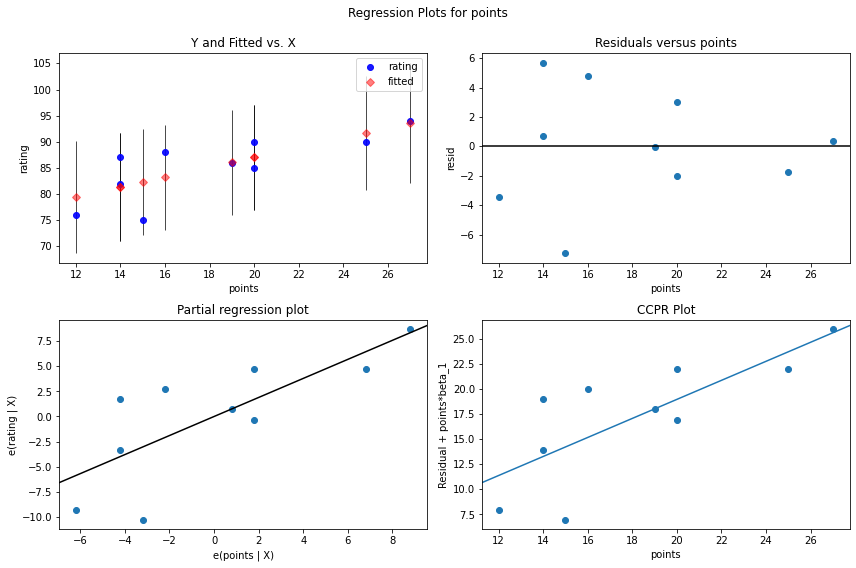

In [13]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'points', fig=fig)

Four plots are produced. The one in the top right corner is the residual vs. fitted plot. The x-axis on this plot shows the actual values for the predictor variable points and the y-axis shows the residual for that value.

Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the predictor variable.

